# Jupyter Notebook for RHESSys to train pyRHESSys 
## - Example: Coweeta subbasin 18

Welcome to the interactive Jupyter notebook to learn how to use pyRHESSys to simulate RHESSys. For this example, we want to simulate RHESSys at Coweeta subbasin 18. The workflow is below: 

1. Install pyRHESSys from GitHub (master branch of pyRHESSys)
2. Download the RHESSys model instance of Coweeta subbasin 18 from HydroShare
3. Download RHESSys execution file and compile the RHESSys model
4. Examine the overview of Coweeta subbasin 18
5. Review and create time-series input files
6. Simulate RHESSys as single run
7. Simulate RHESSys as ensemble runs
8. Evaluate efficiency

## 7. RHESSys Simulation as Ensemble runs

### 7.1 Ensemble simulation

In [1]:
# import pyrhessys library 
import pyrhessys as pr
import os

In [2]:
# check the current directory
current_path = os.getcwd()
current_path

'/home/jovyan/work/pyrhessys'

In [3]:
# set directory of model data folder
model_path = current_path + "/rhessys_coweeta_sub18"
model_path

'/home/jovyan/work/pyrhessys/rhessys_ws18_nlcd_local_choi'

In [4]:
# set path of RHESSys execution file
execution_file = model_path + "/RHESSysEastCoast/rhessys5.20.0.develop"

In [5]:
# create r object using simulation module
r = pr.Simulation(execution_file, model_path)

In [6]:
# check parameters
r.parameters

{'version': 'rhessys5.20.0',
 'start_date': '2010 01 01 01',
 'end_date': '2010 01 10 01',
 'gw1': 0.117211997411679,
 'gw2': 0.0659735129203182,
 's1': 10.1682388144545,
 's2': 0.997275193734094,
 's3': 1.84849880747497,
 'snowEs': 0.605362305999734,
 'snowTs': 1.02025739167741,
 'sv1': 1.73747300930697,
 'sv2': 172.427322705276,
 'svalt1': 0.928032172983822,
 'svalt2': 0.955452497987305}

In [7]:
# set parameter values 
r.parameters['version'] = 'rhessys5.20.0.develop'
r.parameters['start_date'] = '2005 01 01 01'
r.parameters['end_date'] = '2008 12 31 01'
r.parameters['gw1'] = '0.117211997411679'
r.parameters['gw2'] = '0.0659735129203182'
r.parameters['s1'] = '10.1682388144545'
r.parameters['s2'] = '0.997275193734094'
r.parameters['s3'] = '1.84849880747497'
r.parameters['snowEs'] = '0.605362305999734'
r.parameters['snowTs'] = '1.02025739167741'
r.parameters['sv1'] = '1.73747300930697'
r.parameters['sv2'] = '172.427322705276'
r.parameters['svalt1'] = '0.928032172983822'
r.parameters['svalt2'] = '0.955452497987305'

In [8]:
# check parameters again
r.parameters

{'version': 'rhessys5.20.0.develop',
 'start_date': '2005 01 01 01',
 'end_date': '2008 12 31 01',
 'gw1': '0.117211997411679',
 'gw2': '0.0659735129203182',
 's1': '10.1682388144545',
 's2': '0.997275193734094',
 's3': '1.84849880747497',
 'snowEs': '0.605362305999734',
 'snowTs': '1.02025739167741',
 'sv1': '1.73747300930697',
 'sv2': '172.427322705276',
 'svalt1': '0.928032172983822',
 'svalt2': '0.955452497987305'}

In [9]:
# create safe_arange to limit certain length of number
import numpy as np
def safe_arange(start, stop, step):
    a = np.arange(start, stop, step)
    result =[]
    for i in a:
        par = round(i, 10)
        result = np.append(result, par)
    return result

In [10]:
# set start value, end value, interval value for each parameters
param_options = {
   's1': safe_arange(9.0, 11.0, 1.0),
   's2': safe_arange(0.9, 1.1, 0.1),
   'sv1': safe_arange(1.5, 1.9, 0.2)
}

In [11]:
# create ensemble combination using parameter setting as config and check the number of ensemble combination
config = pr.ensemble.parameter_product(param_options)
len(config)

12

In [12]:
# check ensemble combination in config object
config

{'++s1=9.0++s2=0.9++sv1=1.5++': {'parameters': {'s1': 9.0,
   's2': 0.9,
   'sv1': 1.5}},
 '++s1=9.0++s2=0.9++sv1=1.7++': {'parameters': {'s1': 9.0,
   's2': 0.9,
   'sv1': 1.7}},
 '++s1=9.0++s2=1.0++sv1=1.5++': {'parameters': {'s1': 9.0,
   's2': 1.0,
   'sv1': 1.5}},
 '++s1=9.0++s2=1.0++sv1=1.7++': {'parameters': {'s1': 9.0,
   's2': 1.0,
   'sv1': 1.7}},
 '++s1=9.0++s2=1.1++sv1=1.5++': {'parameters': {'s1': 9.0,
   's2': 1.1,
   'sv1': 1.5}},
 '++s1=9.0++s2=1.1++sv1=1.7++': {'parameters': {'s1': 9.0,
   's2': 1.1,
   'sv1': 1.7}},
 '++s1=10.0++s2=0.9++sv1=1.5++': {'parameters': {'s1': 10.0,
   's2': 0.9,
   'sv1': 1.5}},
 '++s1=10.0++s2=0.9++sv1=1.7++': {'parameters': {'s1': 10.0,
   's2': 0.9,
   'sv1': 1.7}},
 '++s1=10.0++s2=1.0++sv1=1.5++': {'parameters': {'s1': 10.0,
   's2': 1.0,
   'sv1': 1.5}},
 '++s1=10.0++s2=1.0++sv1=1.7++': {'parameters': {'s1': 10.0,
   's2': 1.0,
   'sv1': 1.7}},
 '++s1=10.0++s2=1.1++sv1=1.5++': {'parameters': {'s1': 10.0,
   's2': 1.1,
   'sv1': 1.5}},


In [13]:
%%time
e = pr.Ensemble(execution_file, config, model_path, num_workers=len(config))

CPU times: user 706 ms, sys: 160 ms, total: 867 ms
Wall time: 3.47 s


In [14]:
%%time
e.run("local")

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60678 remote=tcp://127.0.0.1:42957>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60680 remote=tcp://127.0.0.1:42957>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60682 remote=tcp://127.0.0.1:42957>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60684 remote=tcp://127.0.0.1:42957>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60686 remote=tcp://127.0.0.1:42957>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60688 remote=tcp://127.0.0.1:42957>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60690 remote=tcp://127.0.0.1:42957>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:60692 remote=tcp://127.0.0.1:42957>
distribu

CPU times: user 2min 43s, sys: 45.1 s, total: 3min 28s
Wall time: 40min 3s


#### Sometimes, the ensemble simulations don't run every ensemble combination because of parallel computing using multiple cores. In this case, we need to check a status of each ensemble simulation, then execute failed ensemble simulations again using the "rerun_failed" method. After that, users have to check the status of the simulation again using the "summary" method

In [15]:
# check simulation success or not
e.summary()

{'success': ['++s1=9.0++s2=0.9++sv1=1.5++',
  '++s1=9.0++s2=0.9++sv1=1.7++',
  '++s1=9.0++s2=1.0++sv1=1.5++',
  '++s1=9.0++s2=1.0++sv1=1.7++',
  '++s1=9.0++s2=1.1++sv1=1.5++',
  '++s1=9.0++s2=1.1++sv1=1.7++',
  '++s1=10.0++s2=0.9++sv1=1.5++',
  '++s1=10.0++s2=0.9++sv1=1.7++',
  '++s1=10.0++s2=1.0++sv1=1.5++',
  '++s1=10.0++s2=1.0++sv1=1.7++',
  '++s1=10.0++s2=1.1++sv1=1.5++',
  '++s1=10.0++s2=1.1++sv1=1.7++'],
 'error': [],
 'other': []}

In [ ]:
# simulate error trials. You have to check e.summary until you get every ensemble simulation
e.rerun_failed("local")

### 7.2 Plot output

In [16]:
# set start date and end date for plot to match with simulation periods
e.parameters['start_date'] = '2005 01 01 01'
e.parameters['end_date'] = '2008 12 31 01'

In [17]:
# change the format 
sim_start_date = e.parameters['start_date'].replace(" ", "-")
sim_end_date = e.parameters['end_date'].replace(" ", "-")

In [18]:
# set start and end date parameters
e.parameters['start_date'] = sim_start_date
e.parameters['end_date'] = sim_end_date

In [19]:
# check parameters
e.parameters

{'version': 'rhessys5.20.0',
 'start_date': '2005-01-01-01',
 'end_date': '2008-12-31-01',
 'gw1': 0.117211997411679,
 'gw2': 0.0659735129203182,
 's1': 10.1682388144545,
 's2': 0.997275193734094,
 's3': 1.84849880747497,
 'snowEs': 0.605362305999734,
 'snowTs': 1.02025739167741,
 'sv1': 1.73747300930697,
 'sv2': 172.427322705276,
 'svalt1': 0.928032172983822,
 'svalt2': 0.955452497987305}

In [20]:
# check ensemble name list
e.name_list

['++s1=9.0++s2=0.9++sv1=1.5++',
 '++s1=9.0++s2=0.9++sv1=1.7++',
 '++s1=9.0++s2=1.0++sv1=1.5++',
 '++s1=9.0++s2=1.0++sv1=1.7++',
 '++s1=9.0++s2=1.1++sv1=1.5++',
 '++s1=9.0++s2=1.1++sv1=1.7++',
 '++s1=10.0++s2=0.9++sv1=1.5++',
 '++s1=10.0++s2=0.9++sv1=1.7++',
 '++s1=10.0++s2=1.0++sv1=1.5++',
 '++s1=10.0++s2=1.0++sv1=1.7++',
 '++s1=10.0++s2=1.1++sv1=1.5++',
 '++s1=10.0++s2=1.1++sv1=1.7++']

In [21]:
# merge every daily model output into a pandas dataframe and check the first case of ensemble simulation
e.merge_output()[0].head()

,Date,day,month,year,basinID,rain_thr,snow_thr,sat_def_z,sat_def,rz_storage,...,apipedrainNO3,apipedrainNH4,apipedrainDON,apipedrainDOC,lawnIrrigated,laiNontree,PAR,unsat_cap,unsat_fc,rtz_fc
0,2005-01-01,1,1,2005,1,0.000000,0.0,148.235592,66.155209,32.963908,...,0.0,0.0,0.0,0.0,0.0,0.0,2.403771e+07,-379.868209,0.014700,65.054403
1,2005-01-02,2,1,2005,1,76.283192,0.0,206.627684,92.208180,55.983055,...,0.0,0.0,0.0,0.0,0.0,0.0,1.579369e+07,-353.815238,2.530527,86.012634
2,2005-01-03,3,1,2005,1,92.607709,0.0,214.729780,95.722743,56.054430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.579369e+07,-350.300676,7.823100,82.451114
3,2005-01-04,4,1,2005,1,109.930404,0.0,187.932472,83.600609,43.395629,...,0.0,0.0,0.0,0.0,0.0,0.0,1.687168e+07,-362.422809,7.705458,71.005985
4,2005-01-05,5,1,2005,1,0.683619,0.0,358.089850,159.786270,92.471509,...,0.0,0.0,0.0,0.0,0.0,0.0,1.958067e+07,-286.237149,11.438738,139.166238


In [36]:
# check the number of layer of pandas dataframe. This number must be the same with the number of ensemble combination.
len(e.merge_output())

12

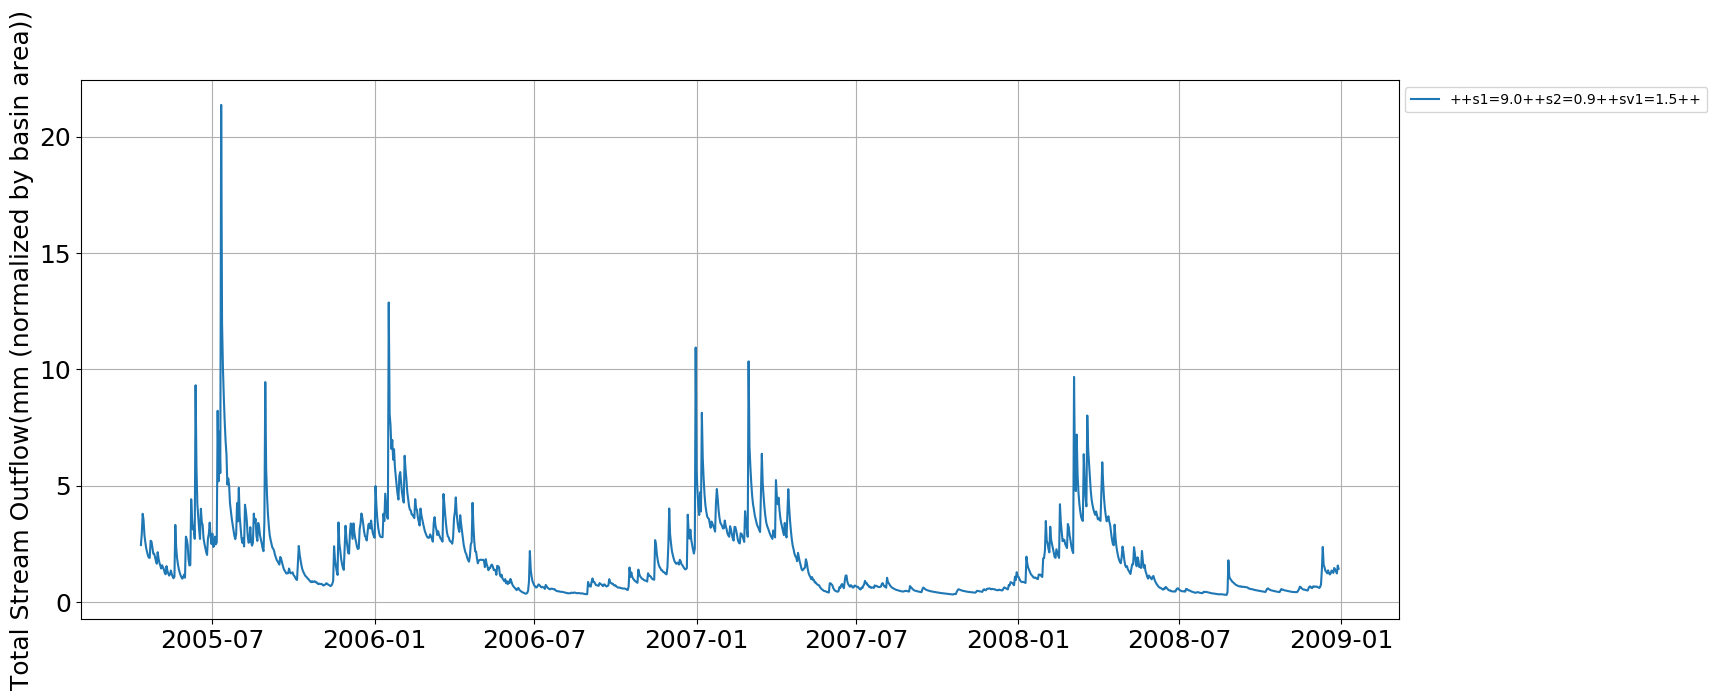

In [37]:
# plot the first case of ensemble simulation using ts_plot method (Time Series Plot)
r.plotting.ts_plot(e.merge_output()[0], 'streamflow', sim_label=e.name_list[0], pre_trim=100)

/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 

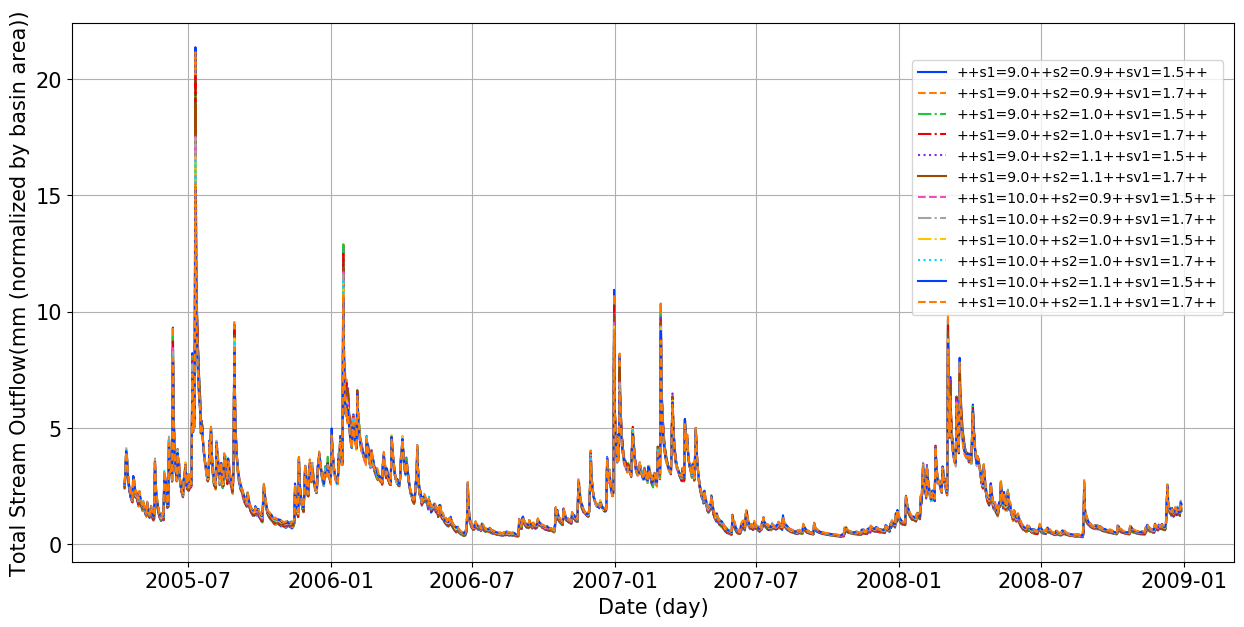

In [24]:
# plot every ensemble simulations for streamflow
r.plotting.ensemble_plot(e.merge_output(), e.name_list, len(e.merge_output()), 'streamflow', pre_trim =100, post_trim=-1)

In [26]:
# import pandas library to create padnas framework
import pandas as pd
# Create Pandas Dataframe from observed streamflow
obs_flow = pd.read_csv(os.path.join(r.obs + '/Qobs_18.csv' ))
# check observed stramflow from section 5.2 to check start date
obs_flow.head()

,year,month,day,date,mmd
0,1936,11,1,1936-11-01,0.850
1,1936,11,2,1936-11-02,0.850
2,1936,11,3,1936-11-03,0.850
3,1936,11,4,1936-11-04,1.615
4,1936,11,5,1936-11-05,1.124


In [28]:
# check observed stramflow from section 5.2 to check end date
obs_flow.tail()

,year,month,day,date,mmd
28484,2014,10,27,2014-10-27,1.162
28485,2014,10,28,2014-10-28,1.125
28486,2014,10,29,2014-10-29,1.049
28487,2014,10,30,2014-10-30,1.011
28488,2014,10,31,2014-10-31,1.049


In [29]:
# set date index 
date_index = pd.date_range(start='1936-11-01', end='2014-10-31', freq='D')
date_index

DatetimeIndex(['1936-11-01', '1936-11-02', '1936-11-03', '1936-11-04',
               '1936-11-05', '1936-11-06', '1936-11-07', '1936-11-08',
               '1936-11-09', '1936-11-10',
               ...
               '2014-10-22', '2014-10-23', '2014-10-24', '2014-10-25',
               '2014-10-26', '2014-10-27', '2014-10-28', '2014-10-29',
               '2014-10-30', '2014-10-31'],
              dtype='datetime64[ns]', length=28489, freq='D')

In [30]:
# check date index
obs_data = obs_flow.set_index(date_index)
obs_data.head()

,year,month,day,date,mmd
1936-11-01,1936,11,1,1936-11-01,0.850
1936-11-02,1936,11,2,1936-11-02,0.850
1936-11-03,1936,11,3,1936-11-03,0.850
1936-11-04,1936,11,4,1936-11-04,1.615
1936-11-05,1936,11,5,1936-11-05,1.124


In [31]:
# clip observed streamflow as the same with simulation periods
obs_data_f = obs_data['2005-01-01':'2008-12-31']
obs_data_f.head()

,year,month,day,date,mmd
2005-01-01,2005,1,1,2005-01-01,4.081
2005-01-02,2005,1,2,2005-01-02,3.996
2005-01-03,2005,1,3,2005-01-03,3.911
2005-01-04,2005,1,4,2005-01-04,3.845
2005-01-05,2005,1,5,2005-01-05,3.741


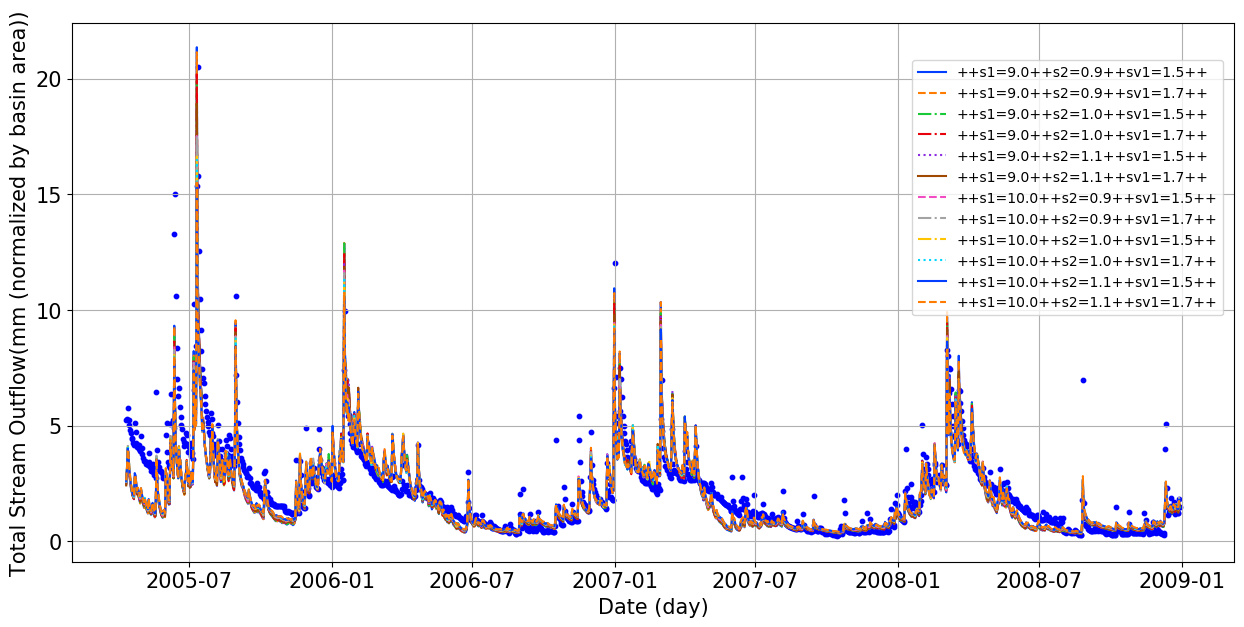

In [32]:
# plot every streamflow ensemble simulations with observation streamflow(blue scatter plot)
r.plotting.ensemble_obs_plot(e.merge_output(), e.name_list, len(e.merge_output()), 'streamflow', obs_data_f, "mmd", pre_trim =100, post_trim=-1)

## 8. Efficiency evaluation

In [33]:
# HydroEval is an open-source evaluator for streamflow time series in Python. "https://github.com/ThibHlln/hydroeval"
from hydroeval import *

In [34]:
# use the evaluator with the Root Mean Square Error
for num, value in enumerate(e.merge_output()):
    simulation_streamflow = value["streamflow"][366:].values
    obs_streamflow = obs_data_f["mmd"][366:-1].values
    my_rmse = evaluator(rmse, simulation_streamflow, obs_streamflow)
    print("Root Mean Square Error:", e.name_list[num], my_rmse)

Root Mean Square Error: ++s1=9.0++s2=0.9++sv1=1.5++ [0.68962041]
Root Mean Square Error: ++s1=9.0++s2=0.9++sv1=1.7++ [0.68124921]
Root Mean Square Error: ++s1=9.0++s2=1.0++sv1=1.5++ [0.6749153]
Root Mean Square Error: ++s1=9.0++s2=1.0++sv1=1.7++ [0.666127]
Root Mean Square Error: ++s1=9.0++s2=1.1++sv1=1.5++ [0.66183302]
Root Mean Square Error: ++s1=9.0++s2=1.1++sv1=1.7++ [0.65428145]
Root Mean Square Error: ++s1=10.0++s2=0.9++sv1=1.5++ [0.63700853]
Root Mean Square Error: ++s1=10.0++s2=0.9++sv1=1.7++ [0.63225308]
Root Mean Square Error: ++s1=10.0++s2=1.0++sv1=1.5++ [0.63115359]
Root Mean Square Error: ++s1=10.0++s2=1.0++sv1=1.7++ [0.62521241]
Root Mean Square Error: ++s1=10.0++s2=1.1++sv1=1.5++ [0.62707457]
Root Mean Square Error: ++s1=10.0++s2=1.1++sv1=1.7++ [0.62096119]


In [35]:
# use the evaluator with the Nash Sutcliffe Efficiency
for num, value in enumerate(e.merge_output()):
    simulation_streamflow = value["streamflow"][366:].values
    obs_streamflow = obs_data_f["mmd"][366:-1].values
    my_nse = evaluator(nse, simulation_streamflow, obs_streamflow)
    print("Nash Sutcliffe Efficiency:", e.name_list[num], my_nse)

Nash Sutcliffe Efficiency: ++s1=9.0++s2=0.9++sv1=1.5++ [0.76929331]
Nash Sutcliffe Efficiency: ++s1=9.0++s2=0.9++sv1=1.7++ [0.77486035]
Nash Sutcliffe Efficiency: ++s1=9.0++s2=1.0++sv1=1.5++ [0.77902735]
Nash Sutcliffe Efficiency: ++s1=9.0++s2=1.0++sv1=1.7++ [0.7847446]
Nash Sutcliffe Efficiency: ++s1=9.0++s2=1.1++sv1=1.5++ [0.78751081]
Nash Sutcliffe Efficiency: ++s1=9.0++s2=1.1++sv1=1.7++ [0.79233219]
Nash Sutcliffe Efficiency: ++s1=10.0++s2=0.9++sv1=1.5++ [0.80315224]
Nash Sutcliffe Efficiency: ++s1=10.0++s2=0.9++sv1=1.7++ [0.80608032]
Nash Sutcliffe Efficiency: ++s1=10.0++s2=1.0++sv1=1.5++ [0.80675419]
Nash Sutcliffe Efficiency: ++s1=10.0++s2=1.0++sv1=1.7++ [0.81037519]
Nash Sutcliffe Efficiency: ++s1=10.0++s2=1.1++sv1=1.5++ [0.80924394]
Nash Sutcliffe Efficiency: ++s1=10.0++s2=1.1++sv1=1.7++ [0.81294519]
